In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# Read dataset file
df = pd.read_csv('Daily_4b.csv')
df

,Date,Price,R,W1,W2,W3,W4,Date Number
0,1/3/2017,3638000,NaN,0,0,0,0,42738
1,1/4/2017,3645000,0.19%,0,0,0,0,42739
2,1/5/2017,3665000,0.55%,0,0,0,0,42740
3,1/6/2017,3650000,-0.41%,0,0,0,0,42741
4,1/7/2017,3660000,0.27%,0,0,0,0,42742
...,...,...,...,...,...,...,...,...
1486,12/27/2021,6140000,0.00%,0,0,0,1,44557
1487,12/28/2021,6140000,0.00%,0,0,0,1,44558
1488,12/29/2021,6115000,-0.41%,0,0,0,1,44559
1489,12/30/2021,6120000,0.08%,0,0,0,1,44560


In [ ]:
# Read dataset file
df = pd.read_csv('Daily_4b.csv')
df_origin=df
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets by 8:1:1
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
df.head()

,Price
0,3638000
1,3645000
2,3665000
3,3650000
4,3660000


In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=6.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=28767.921, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=28762.891, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=28807.910, Time=0.43 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=28761.771, Time=0.47 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=28737.347, Time=0.83 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=28735.362, Time=1.36 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=28721.782, Time=4.95 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=8.03 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=6.96 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=28723.819, Time=3.07 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 32.533 seconds


ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1192
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -14354.891
Date:                Sun, 28 Apr 2024   AIC                          28721.782
Time:                        16:41:41   BIC                          28752.272
Sample:                             0   HQIC                         28733.272
                               - 1192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2290      0.003    -87.394      0.000      -0.234      -0.224
ar.L2         -0.1899      0.003    -70.058      0.000      -0.195      -0.185
ar.L3         -0.1590      0.002    -66.912      0.000      -0.164      -0.154
ar.L4         -0.0996      0.002    -46.274      0.000      -0.104      -0.095
ar.L5         -0.0483      0.002    -27.768      0.000      -0.052      -0.045
sigma2      1.106e+09   1.03e-12   1.07e+21      0.000    1.11e+09    1.11e+09
===================================================================================
Ljung-Box (L1) (Q):                 141.87   Jarque-Bera (JB):            114327.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.25   Skew:                            -2.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        50.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+35. Standard errors may be unstable.
"""

In [ ]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# make predictions on the validate set
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

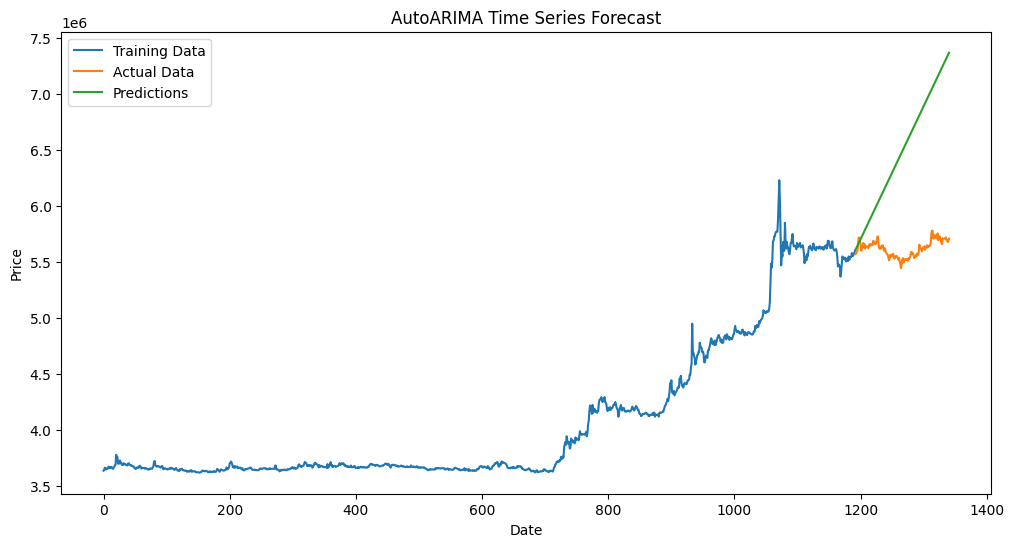

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
x=np.array(df_origin["Date Number"]).reshape((-1, 1))
y=np.array(df_origin["Price"]).reshape((-1, 1))
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
print("Intercept term: ",model.intercept_)
print("R_coef: ", model.coef_)
print("R Square: ", model.score(x, y))

Intercept term:  [-62731809.69288268]
R_coef:  [[1538.45455619]]
R Square:  0.8280594886866178


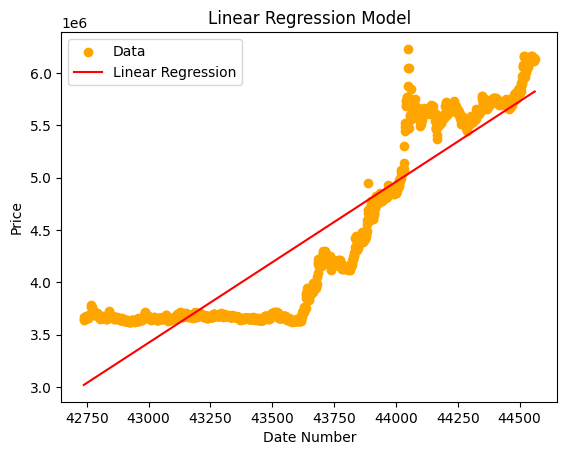

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.scatter(x, y, color='orange', label='Data')

plt.plot(x, model.predict(x), color='red', label='Linear Regression')

plt.xlabel('Date Number')
plt.ylabel('Price')
plt.title('Linear Regression Model')
plt.legend()

plt.show()
